# Import modules

In [1]:
!pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28555 sha256=334b8e25e6f1b3e149b04953e373da5c91bebf42a3c65c0bb5d20481d803bc44
  Stored in directory: /home/iiitmk/.cache/pip/wheels/d4/a9/cf/8c4753b208759e9509ade040a94c3d4271f1756f529c575dc8
Successfully built mplleaflet


In [1]:
!pip install osgeo

In [2]:
!pip install pysheds


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pysheds.grid import Grid
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import rasterio

# Instatiate a grid from a DEM raster

Data from USGS hydrosheds project: https://hydrosheds.cr.usgs.gov/datadownload.php

In [4]:
# grid = Grid.from_raster('../data/n30w100_con', data_name='dem')

In [5]:
grid = Grid.from_raster('/home/iiitmk/Desktop/GIS_repo/Tiff_output.r/slope_idukki1.tif', data_name='dem')

In [6]:
#Define a function to plot the digital elevation model 
def plotFigure(data, label, cmap='Purples'):
    plt.figure(figsize=(12,10))
    plt.imshow(data ,extent=grid.extent, cmap = 'viridis')
    plt.colorbar(label=label, cmap=cmap)
    plt.grid()

In [7]:
# fig, ax = plt.subplots(figsize=(8,6))
# fig.patch.set_alpha(0)

# plt.imshow(grid.dem, extent=grid.extent, cmap='cubehelix', zorder=1)
# plt.colorbar(label='Elevation (m)')
# plt.grid(zorder=0)
# plt.title('Digital elevation map')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.tight_layout()
# plt.savefig('conditioned_dem.png', bbox_inches='tight')

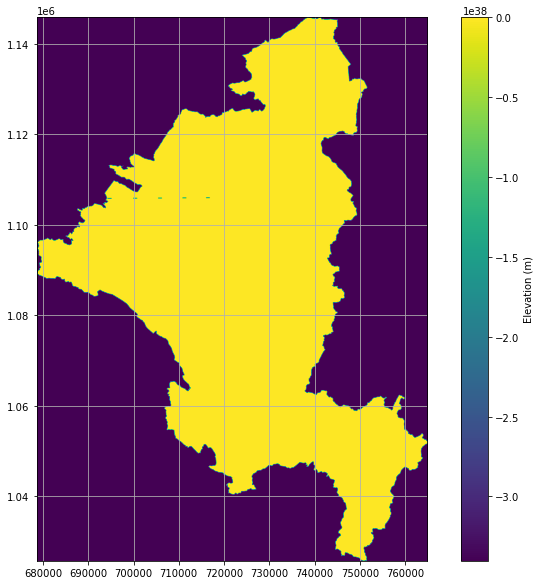

In [8]:
#Minnor slicing on borders to enhance colobars
elevDem=grid.dem[:-1,:-1]
plotFigure(elevDem, 'Elevation (m)')

In [9]:
derpressions = grid.detect_depressions('dem')

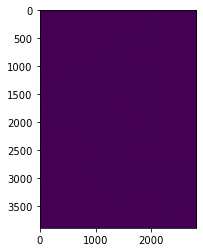

In [10]:
plt.imshow(derpressions)

In [11]:
grid.fill_depressions(data= 'dem', out_name= 'flooded_dem')

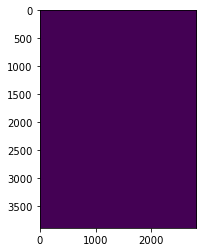

In [12]:
derpressions = grid.detect_depressions('flooded_dem')
plt.imshow(derpressions)

# Resolve flats in DEM

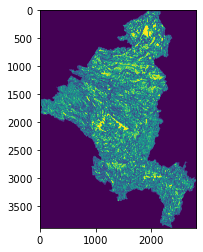

In [13]:
flats = grid.detect_flats('flooded_dem')
plt.imshow(flats)

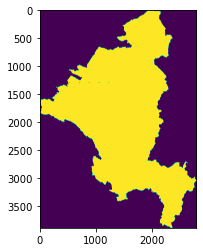

In [14]:
grid.resolve_flats(data='flooded_dem', out_name='inflated_dem')
plt.imshow(grid.inflated_dem[:-1,:-1])


# Specify flow direction values

In [15]:
         #N    NE    E    SE    S    SW    W    NW
dirmap = (64,  128,  1,   2,    4,   8,    16,  32)


# Convert DEM to flow direction grid

In [16]:
grid.flowdir(data='inflated_dem', out_name='dir', dirmap=dirmap)

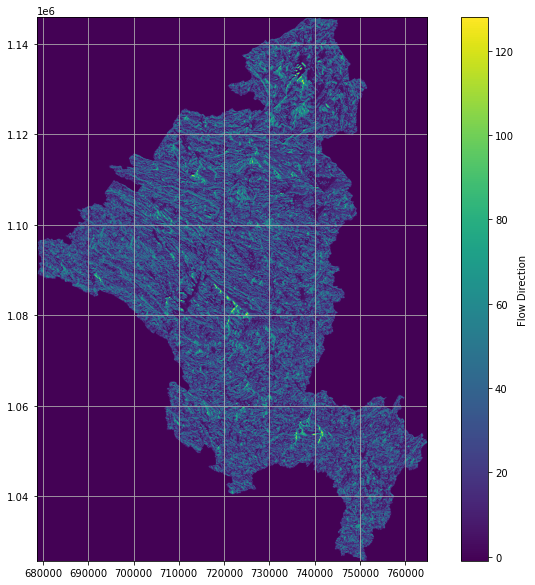

In [17]:
plotFigure(grid.dir,'Flow Direction','Greens')


In [18]:
# fig = plt.figure(figsize=(8,6))
# fig.patch.set_alpha(0)

# plt.imshow(grid.dir, extent=grid.extent, cmap='viridis', zorder=2)
# boundaries = ([0] + sorted(list(dirmap)))
# plt.colorbar(boundaries= boundaries,
#              values=sorted(dirmap))
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Flow direction grid')
# plt.grid(zorder=-1)
# plt.tight_layout()
# plt.savefig('flow_direction.png', bbox_inches='tight')

# Read a flow direction grid from a raster

Data from USGS hydrosheds project: https://hydrosheds.cr.usgs.gov/datadownload.php

In [19]:
# grid.read_raster('/content/drive/MyDrive/TIF_output/flow_dir1.tif', data_name='dir')

# Examine grid

In [20]:
# grid.dir

In [21]:
# grid.dir.size

# Examine grid

In [42]:
# fig = plt.figure(figsize=(8,6))
# fig.patch.set_alpha(0)

# plt.imshow(grid.dir, extent=grid.extent, cmap='viridis', zorder=2)
# boundaries = ([0] + sorted(list(dirmap)))
# plt.colorbar(boundaries= boundaries,
#              values=sorted(dirmap))
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Flow direction grid')
# plt.grid(zorder=-1)
# plt.tight_layout()

# Delineate catchment

In [58]:
# Specify pour point
x, y = 740000,980000

# Delineate the catchment
grid.catchment(data='dir', x=x, y=y, dirmap=dirmap, out_name='catch',
               recursionlimit=15000, xytype='label', nodata_out=0)

In [44]:
# # Clip the bounding box to the catchment
# try:
#   grid.clip_to('catch')
# except ValueError:
#   pass

In [59]:
grid.view('catch')

Raster([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [60]:
# Get a view of the catchment
demview = grid.view('dem', nodata=np.nan)

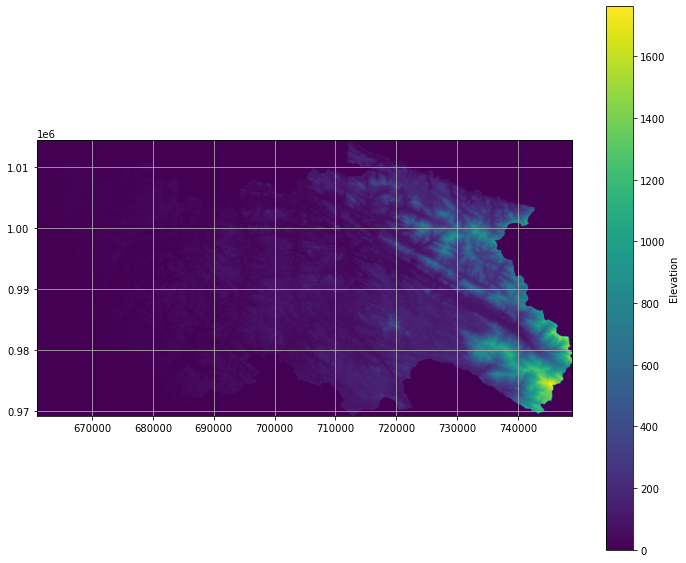

In [61]:
plotFigure(demview,'Elevation')


In [48]:
#export selected raster
grid.to_raster(demview, 'clippedElevations_WGS84.tif')

In [49]:
# # Plot the catchment
# fig, ax = plt.subplots(figsize=(8,6))
# fig.patch.set_alpha(0)

# plt.grid('on', zorder=0)
# im = ax.imshow(catch, extent=grid.extent, zorder=1, cmap='viridis')
# plt.colorbar(im, ax=ax, boundaries=boundaries, values=sorted(dirmap), label='Flow Direction')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Delineated Catchment')
# plt.savefig('catchment.png', bbox_inches='tight')

# Get flow accumulation

In [63]:
# grid.accumulation(data='catch', dirmap=dirmap, out_name='acc')

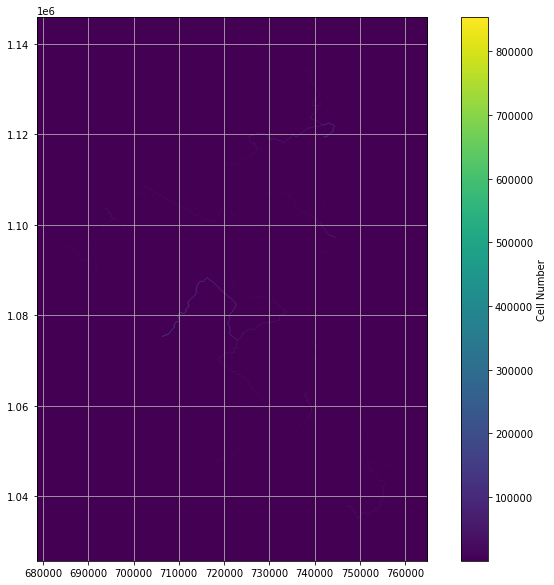

In [22]:
grid.accumulation(data='catch', dirmap=dirmap, pad_inplace=False, out_name='acc')

accView = grid.view('acc', nodata=np.nan)
plotFigure(accView,"Cell Number",'PuRd')

In [23]:
streams = grid.extract_river_network('catch', 'acc', threshold=200, dirmap=dirmap)
streams["features"][:2]


NameError: nodata value for 'catch' not found in instance.

In [53]:
def saveDict(dic,file):
    f = open(file,'w')
    f.write(str(dic))
    f.close()

In [54]:
saveDict(streams,'streams_WGS84.geojson')


In [55]:
!pip install geopandas

  Using cached geopandas-0.8.1-py2.py3-none-any.whl (962 kB)
     |████████████████████████████████| 1.0 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 14.7 MB 2.0 MB/s eta 0:00:01
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)


In [56]:
import geopandas as gpd

In [57]:
streamNet = gpd.read_file('/home/iiitmk/Desktop/GIS_repo/streams_WGS84.geojson')
streamNet.crs = {'init' :'epsg:4326'}

DriverError: /home/iiitmk/Desktop/GIS_repo/streams_WGS84.geojson: No such file or directory

In [ ]:
# The polygonize argument defaults to the grid mask when no arguments are supplied
shapes = grid.polygonize()
# Plot catchment boundaries
fig, ax = plt.subplots(figsize=(6.5, 6.5))
for shape in shapes:
    coords = np.asarray(shape[0]['coordinates'][0])
    ax.plot(coords[:,0], coords[:,1], color='cyan')

ax.set_xlim(grid.bbox[0], grid.bbox[2])
ax.set_ylim(grid.bbox[1], grid.bbox[3])
ax.set_title('Catchment boundary (vector)')
gpd.plotting.plot_dataframe(streamNet, None, cmap='Blues', ax=ax)
#ax = streamNet.plot()


In [37]:
mplleaflet.display(fig=ax.figure, crs=streamNet.crs, tiles='esri_aerial')

NameError: ignored

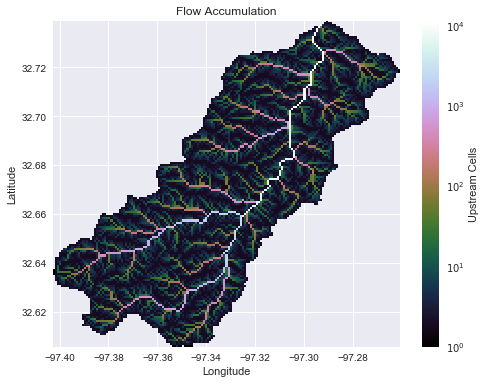

In [ ]:
# fig, ax = plt.subplots(figsize=(8,6))
# fig.patch.set_alpha(0)
# plt.grid('on', zorder=0)
# acc_img = np.where(grid.mask, grid.acc + 1, np.nan)
# im = ax.imshow(acc_img, extent=grid.extent, zorder=2,
#                cmap='cubehelix',
#                norm=colors.LogNorm(1, grid.acc.max()))
# plt.colorbar(im, ax=ax, label='Upstream Cells')
# plt.title('Flow Accumulation')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.savefig('img/flow_accumulation.png', bbox_inches='tight')

# Get distances to upstream cells

In [ ]:
grid.flow_distance(data='catch', x=x, y=y, dirmap=dirmap, out_name='dist',
                   xytype='label', nodata_out=np.nan)

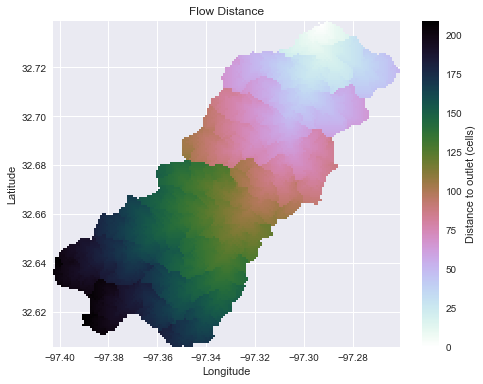

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
plt.grid('on', zorder=0)
im = ax.imshow(grid.dist, extent=grid.extent, zorder=2,
               cmap='cubehelix_r')
plt.colorbar(im, ax=ax, label='Distance to outlet (cells)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flow Distance')
plt.savefig('img/flow_distance.png', bbox_inches='tight')

In [ ]:
!pip install richdem


     |████████████████████████████████| 4.5MB 5.5MB/s 


In [ ]:
!pip install gdal


In [4]:
from osgeo import gdal
import richdem as rd

ImportError: cannot import name 'gdal' from 'osgeo' (/home/iiitmk/anaconda3/lib/python3.8/site-packages/osgeo/__init__.py)

In [ ]:
dem = rd.LoadGDAL('/content/m_alappuzha1.tif')

In [ ]:
slp5 = rd.TerrainAttribute(dem, attrib="slope_degrees")

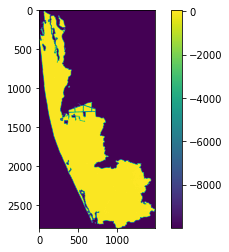

In [ ]:
plt.figure()
plt.imshow(slp5)
plt.colorbar()
plt.show()

In [ ]:
rd.SaveGDAL('slooope.tif',slp5)